In [670]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

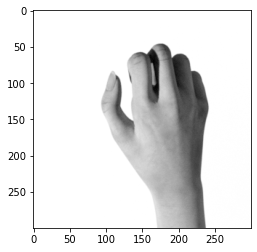

In [671]:
# This cell is used to show an image from the dataset. 

DATADIR = r"C:\Users\markn\OneDrive\Desktop\Spring 2021\CS 4662 - Advanced Machine Learning\RPS"
# subfolders in RPS folder
CATEGORIES = ["rock", "paper", "scissors"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # paths to RPS dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        # changing to grayscale so its faster processing.
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [672]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 254]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 253 254]
 [255 255 255 ... 254 254 254]]


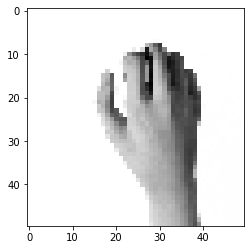

In [673]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [674]:
# creating the training set, getting the dimensions of the image, 
# and giving it a label based on it being rock, paper, or scissors.

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # paths to RPS dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [675]:
print(len(training_data))

2520


In [676]:
import random

# shuffles the training set.
random.shuffle(training_data)

In [677]:
# shows that the training set is shuffled
for sample in training_data[:10]:
    print(sample[1])

2
2
2
1
1
1
0
1
0
1


In [678]:
X = []
y = []

In [679]:
for features, label in training_data:
    X.append(features)
    y.append(label)

# import note: the 1 at the end represents grayscale. if using color,
# make sure to use 3 instead of 1. 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = y #REPLACE THIS LINE WITH YOUR ARRAY


data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)

In [680]:
X[1]

array([[[254],
        [254],
        [253],
        ...,
        [253],
        [253],
        [253]],

       [[255],
        [254],
        [254],
        ...,
        [253],
        [253],
        [253]],

       [[254],
        [254],
        [254],
        ...,
        [253],
        [252],
        [253]],

       ...,

       [[251],
        [251],
        [251],
        ...,
        [249],
        [249],
        [250]],

       [[252],
        [252],
        [251],
        ...,
        [250],
        [249],
        [250]],

       [[251],
        [251],
        [251],
        ...,
        [249],
        [250],
        [250]]], dtype=uint8)

In [681]:
print(X.shape)

(2520, 50, 50, 1)


In [682]:
print(y.shape)

(2520,)


In [683]:
model = Sequential ([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(X.shape[1:])),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=1, activation='softmax')
])

In [684]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 9217      
Total params: 28,033
Trainable params: 28,033
Non-trainable params: 0
_________________________________________________

In [685]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [686]:
model.fit(X, y, batch_size=32, epochs=10)

Epoch 1/10
79/79 [==============================] - 3s 29ms/step - loss: 0.0000e+00 - accuracy: 0.3351
Epoch 2/10
79/79 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - accuracy: 0.3306
Epoch 3/10
79/79 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - accuracy: 0.3467
Epoch 4/10
79/79 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - accuracy: 0.3327
Epoch 5/10
79/79 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - accuracy: 0.3343
Epoch 6/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - accuracy: 0.3321
Epoch 7/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - accuracy: 0.3428
Epoch 8/10
79/79 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - accuracy: 0.3247
Epoch 9/10
79/79 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - accuracy: 0.3308
Epoch 10/10
79/79 [==============================] - 2s 28ms/step - loss:

In [688]:
model.evaluate(X, y)

79/79 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.3333


[0.0, 0.3333333432674408]